##Cotton Plant Disease Prediction


###Importing the libraries

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

###Importing the dataset

In [ ]:
train_data_path = "/content/drive/MyDrive/cotton plant disease prediction/data/train"
validation_data_path = "/content/drive/MyDrive/cotton plant disease prediction/data/val"

###Data Augmentation


####Augmentation fro training

In [ ]:
##Data Augmentaion generate more images
##Data Augmentaion for training dataset
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=35,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      fill_mode="nearest")

training_data = training_datagen.flow_from_directory(train_data_path,
                                                     target_size=(150,150),
                                                     batch_size=32,
                                                     class_mode="binary")

Found 1951 images belonging to 4 classes.


In [ ]:
training_data

In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

####Augmentation for validation

In [ ]:
validation_datagen = ImageDataGenerator(1./255)
validation_data = validation_datagen.flow_from_directory(validation_data_path,
                                                         target_size = (150,150),
                                                         batch_size=32,
                                                         class_mode="binary")

Found 324 images belonging to 4 classes.


##Plot Images function

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

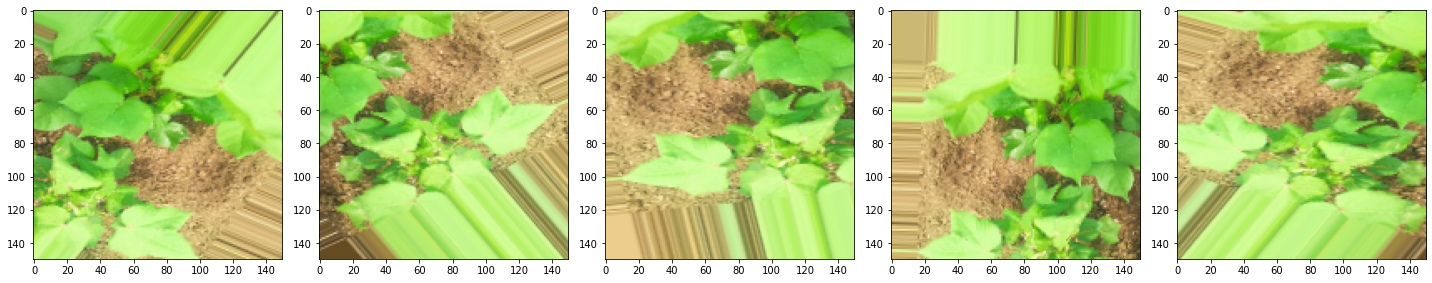

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

###ModelCheckpoint

In [ ]:
##Checkpointing is setup to save the network weights
## only when there is an improvement in classification accuracy on the validation dataset
## (monitor=’val_accuracy’ and mode=’max’).
model_path = "/content/drive/MyDrive/cotton plant disease prediction/cott_plant_disease2.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
callbacks_list = [checkpoint]

##Building the CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
####VGGNet 16 Implementation
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=3, input_shape=[150,150,3]))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64, kernel_size=3))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=128, kernel_size=3))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=256, kernel_size=3))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128,activation="relu"))
cnn_model.add(Dropout(0.15))
cnn_model.add(Dense(units=256, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=4,activation="softmax"))


In [ ]:
cnn_model.compile(optimizer=Adam(lr=0.0001),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
trained_model = cnn_model.fit(training_data,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_data,
                              callbacks=callbacks_list)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2671 - accuracy: 0.4290

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


61/61 [==============================] - 34s 516ms/step - loss: 1.2671 - accuracy: 0.4290 - val_loss: 72.4825 - val_accuracy: 0.4630

Epoch 00001: val_accuracy improved from -inf to 0.46296, saving model to /content/drive/MyDrive/cotton plant disease prediction/cott_plant_disease2.h5
Epoch 2/100
61/61 [==============================] - 31s 509ms/step - loss: 1.0791 - accuracy: 0.5274 - val_loss: 124.1332 - val_accuracy: 0.5185

Epoch 00002: val_accuracy improved from 0.46296 to 0.51852, saving model to /content/drive/MyDrive/cotton plant disease prediction/cott_plant_disease2.h5
Epoch 3/100
61/61 [==============================] - 31s 500ms/step - loss: 1.0210 - accuracy: 0.5756 - val_loss: 72.0247 - val_accuracy: 0.6049

Epoch 00003: val_accuracy improved from 0.51852 to 0.60494, saving model to /content/drive/MyDrive/cotton plant disease prediction/cott_plant_disease2.h5
Epoch 4/100
61/61 [==============================] - 31s 502ms/step - loss: 0.9034 - accuracy: 0.6386 - val_loss: 

###Plot for Accuracy

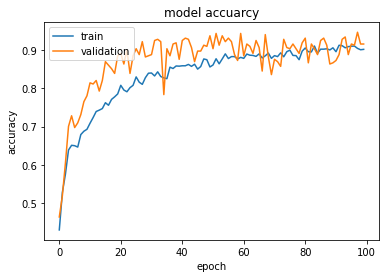

In [ ]:

plt.plot(trained_model.history["accuracy"])
plt.plot(trained_model.history["val_accuracy"])
plt.title('model accuarcy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()


###Plot for loss

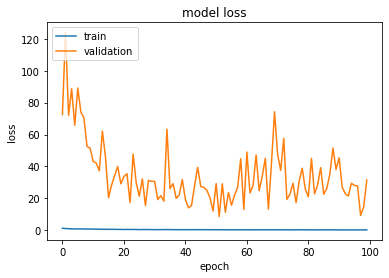

In [ ]:

plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["val_loss"])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()

In [ ]:
trained_model.history

{'accuracy': [0.4290107488632202,
  0.5274218320846558,
  0.5756022334098816,
  0.6386468410491943,
  0.6509482264518738,
  0.6499231457710266,
  0.6463351845741272,
  0.6791388988494873,
  0.6878523826599121,
  0.6929779648780823,
  0.7088672518730164,
  0.7237313985824585,
  0.7396206855773926,
  0.7432085871696472,
  0.7473090887069702,
  0.7626857757568359,
  0.756022572517395,
  0.7713992595672607,
  0.7780625224113464,
  0.7857509255409241,
  0.8083034157752991,
  0.7960020303726196,
  0.7913890480995178,
  0.8021527528762817,
  0.8083034157752991,
  0.8303434252738953,
  0.8165043592453003,
  0.8108662366867065,
  0.8282932043075562,
  0.8400819897651672,
  0.8405945897102356,
  0.832906186580658,
  0.8436698913574219,
  0.8313685059547424,
  0.8277806043624878,
  0.8257303833961487,
  0.8559712767601013,
  0.8523833751678467,
  0.8590466380119324,
  0.8585340976715088,
  0.859559178352356,
  0.859559178352356,
  0.8631470799446106,
  0.8580214977264404,
  0.863659679889679,
  0